In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import classD_1dMFGTN  # make sure this points to the lowercase file

importlib.reload(classD_1dMFGTN)
from classD_1dMFGTN import classD_1d_MFGTN

In [ ]:

N_list = 32
mu_list = np.linspace(0, 4, 21)

model = classD_1d_MFGTN(N=N, mu_1 = 3, DW=False, nshell=None)


------------------------- classD_1d_MFGTN Initialized -------------------------


In [187]:

# 2) Run a single-sample adaptive circuit with postselection
result = model.run_adaptive_circuit(
    cycles=20,              # adjust as needed
    G_history=True,
    progress=True,
    postselect=False,
    samples=1,
    parallelize_samples=False,
    store="top",           # keep full covariance per cycle
    init_mode="random_pure",
)

G_hist = result["G_hist"][0]   # shape (T, 2N, 2N)
T = G_hist.shape[0]
print(G_hist.shape)


Running adaptive circuit (sites)::   0%|          | 0/640 [00:00<?, ?site/s]

Total elapsed: 8.24 s
(21, 64, 64)


In [188]:

# 3) Exact Kitaev ground-state covariance
G_exact = model.kitaev_GS_covariance(N=N, mu=model.mu_1, DW=False, PBCs=True)

# 4) Frobenius norms vs time
fro_diffs = [np.linalg.norm(G_hist[t] - G_exact, ord="fro") for t in range(T)]


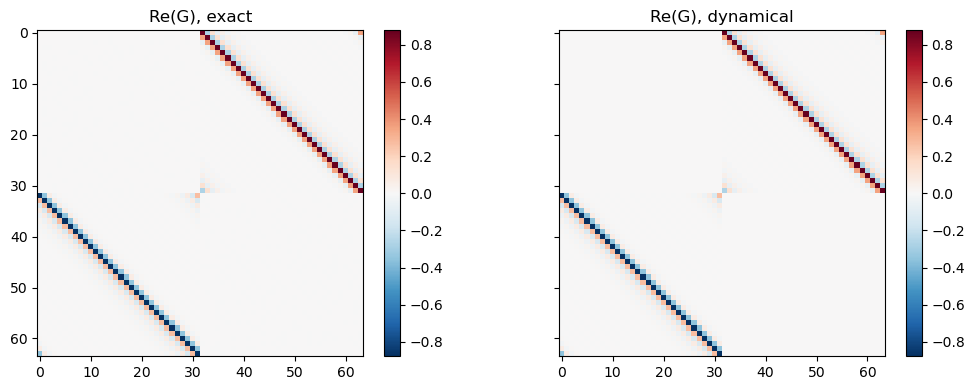

In [189]:

fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
im = axs[0].imshow(np.real(G_exact), cmap="RdBu_r")
axs[0].set_title(rf"Re(G), exact")
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
im = axs[1].imshow(np.real(G_hist[-1]), cmap="RdBu_r")
axs[1].set_title(rf"Re(G), dynamical")
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.show()


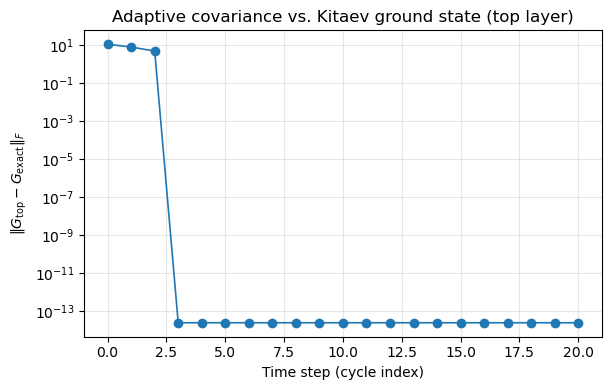

In [190]:

# 5) Plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(T), fro_diffs, marker="o", lw=1.2)
plt.xlabel("Time step (cycle index)")
plt.ylabel(r"$\|G_{\mathrm{top}} - G_{\mathrm{exact}}\|_F$")
plt.title("Adaptive covariance vs. Kitaev ground state (top layer)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.yscale("log")
plt.show()

In [ ]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
data = np.load("results/mi_scan_finer.npz", allow_pickle=True)


In [12]:
mu_list = data["mu_list"]
N_list = data["N_list"].tolist()
nshell_list = data["nshell_list"].tolist()[-1:]
print(nshell_list)
mi_mean = data["mi_mean"].item()  # dict
mi_std = data["mi_std"].item()    # dict


[3]


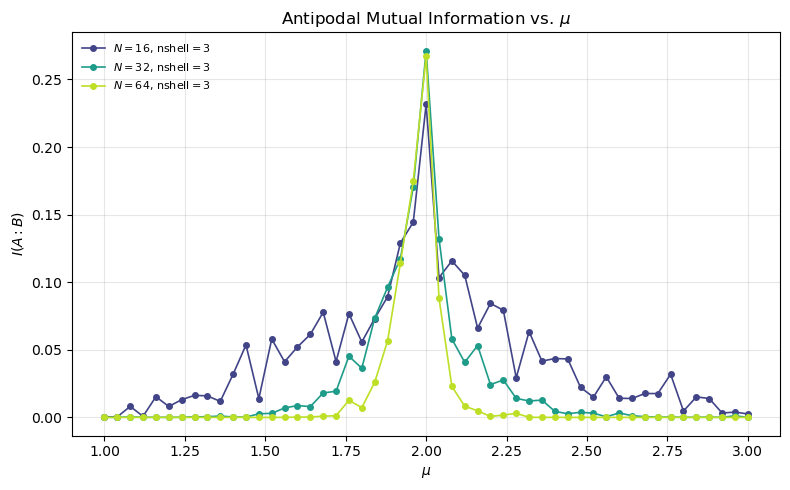

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))
colors = cm.viridis(np.linspace(0.2, 0.9, len(N_list)))
markers = ["o", "s", "^", "D", "P"]
for ci, N in enumerate(N_list):
    for mi, nshell in enumerate(nshell_list):
        key = (N, nshell)
        label = rf"$N={N}$, nshell$={nshell}$"
        ax.plot(
            mu_list,
            mi_mean[key],
            marker=markers[mi % len(markers)],
            color=colors[ci],
            label=label,
            linewidth=1.2,
            markersize=4,
        )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\overline{I(A:B)}$")
ax.set_title(r"Traj.-Resolved Antipodal Mutual Information vs. $\mu$")
ax.grid(True, alpha=0.3)
ax.legend(
    loc="upper left",          # e.g., "upper right", "lower center", "center left", "best"
    frameon=False,
    ncol=1,
    fontsize=8,
)
fig.tight_layout()